In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
#mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
from src.utils import *
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
# import train test split
from sklearn.model_selection import train_test_split
import h5py


In [2]:
cd ..

/home/rd804/m-anode


In [3]:
import pickle

back_mean = 0
sig_mean = 3
sig_simga = 0.5
back_sigma = 3


with open('results/true_w.pkl', 'rb') as f:
    true_w = pickle.load(f)



with open('data/data.pkl','rb') as f:
    data = pickle.load(f)


    

In [8]:
sig_train = 1
x_train = data[str(sig_train)]['train']['data']

n_back = 100000

background = np.random.normal(back_mean, back_sigma, n_back)

with open('data/background.pkl', 'wb') as f:
    pickle.dump(background, f)


In [5]:
gmm = GMM(n_components=1, covariance_type='full', tol=1e-3, max_iter=1, init_params='random')

gmmfit = gmm.fit(background.reshape(-1,1))

mu_background = gmmfit.means_[0][0]
sigma_background = gmmfit.covariances_[0][0][0]

print('mu_background: ', mu_background)
print('sigma_background: ', sigma_background)

mu_background:  -0.00807664614659872
sigma_background:  8.930072172151027


/home/rd804/.conda/envs/manode/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [ ]:
background_only_fit = [mu_background, sigma_background]

with open('results/background_only_fit_modified.pkl', 'wb') as f:
    pickle.dump(background_only_fit, f)



In [6]:
best_likelihood = -np.inf

for i in range(10):
    convergence_ = False
    print('Trial: ..............  ', i)
    print('......................')
    print('......................')


    while convergence_ == False:
        convergence_, mu_ , sigma_, w_, likelihood_ = EM_2_gaussian(x_train, n_components=2, max_iter=2000, tol = 1e-32, init_params='fixed',
                        mu_back=mu_background, sigma_back=sigma_background)
        
        max_likelihood_index = np.argmax(likelihood_)
        if likelihood_[max_likelihood_index] > best_likelihood:
            best_likelihood = likelihood_[max_likelihood_index]
            best_mu = mu_[max_likelihood_index]
            best_sigma = sigma_[max_likelihood_index]
            best_w = w_[max_likelihood_index]

    
    print('best_mu: ', best_mu)
    print('best_sigma: ', best_sigma)
    print('best_w: ', best_w)

Trial: ..............   0
......................
......................
Converged after 978 iterations.
best_mu:  [-8.07664615e-03 -9.38057151e+00]
best_sigma:  [8.93007217 4.09153348]
best_w:  [9.99733423e-01 2.66577435e-04]
Trial: ..............   1
......................
......................
Converged after 1182 iterations.
best_mu:  [-8.07664615e-03 -9.38057151e+00]
best_sigma:  [8.93007217 4.09153348]
best_w:  [9.99733423e-01 2.66577435e-04]
Trial: ..............   2
......................
......................
Converged after 1068 iterations.
best_mu:  [-8.07664615e-03 -9.38057151e+00]
best_sigma:  [8.93007217 4.09153348]
best_w:  [9.99733423e-01 2.66577435e-04]
Trial: ..............   3
......................
......................
Did not converge after 1999 iterations.
Did not converge after 1999 iterations.
Did not converge after 1999 iterations.
Did not converge after 1999 iterations.
Converged after 716 iterations.
best_mu:  [-0.00807665  2.67717858]
best_sigma:  [8.9300

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


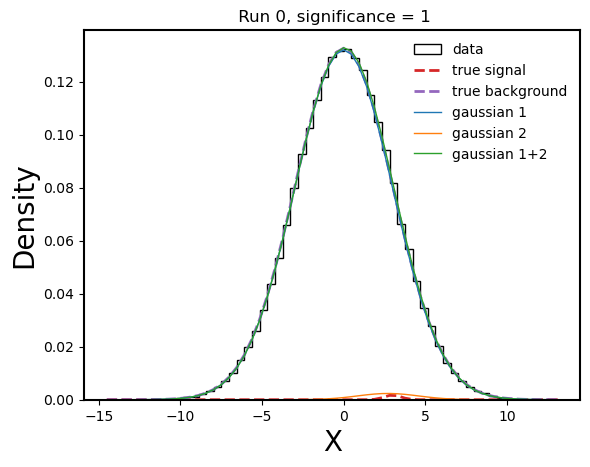

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


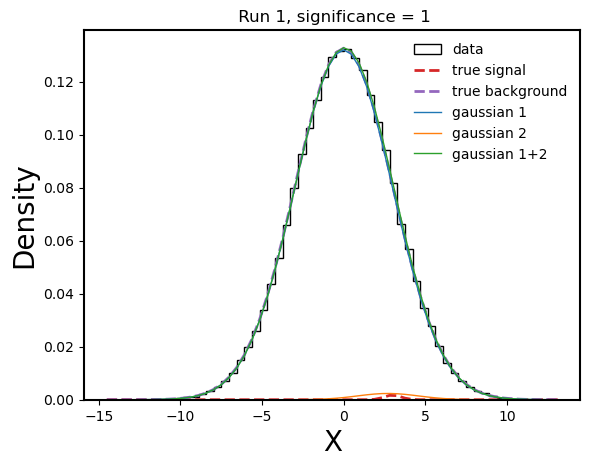

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


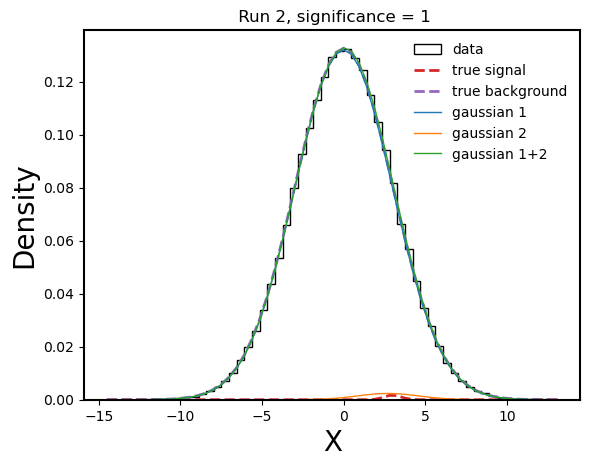

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


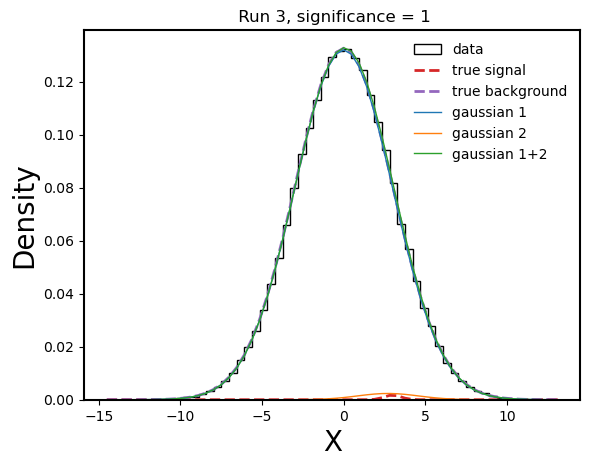

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


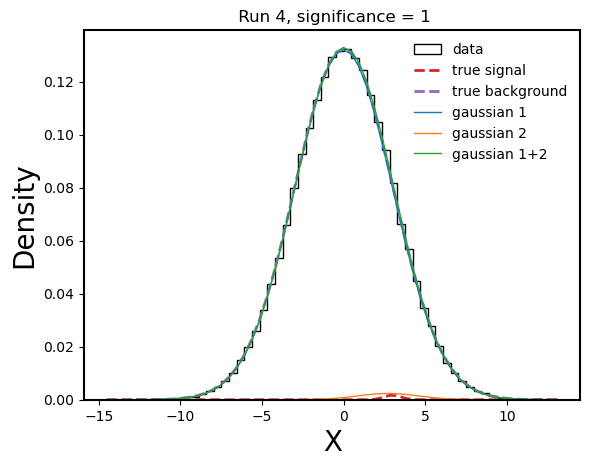

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


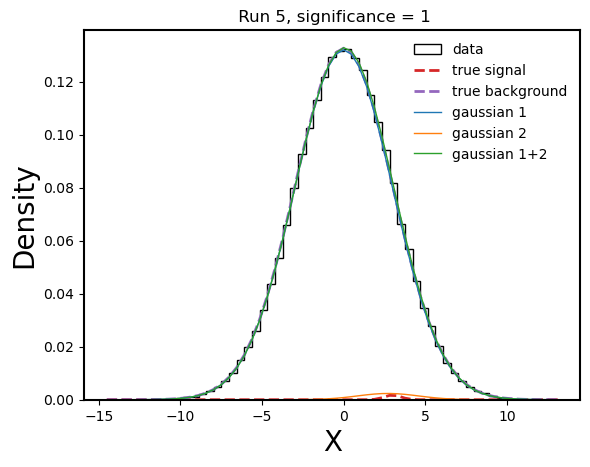

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


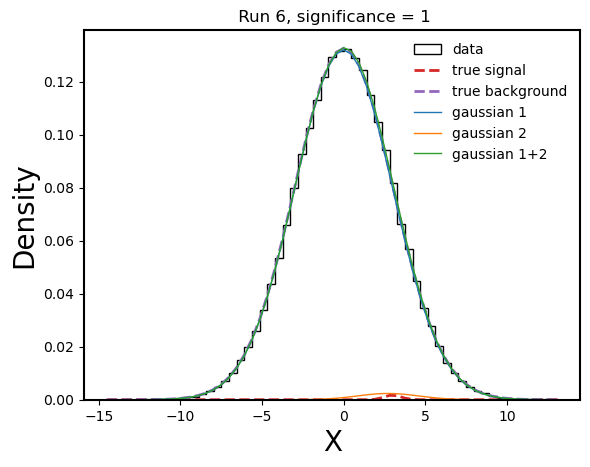

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


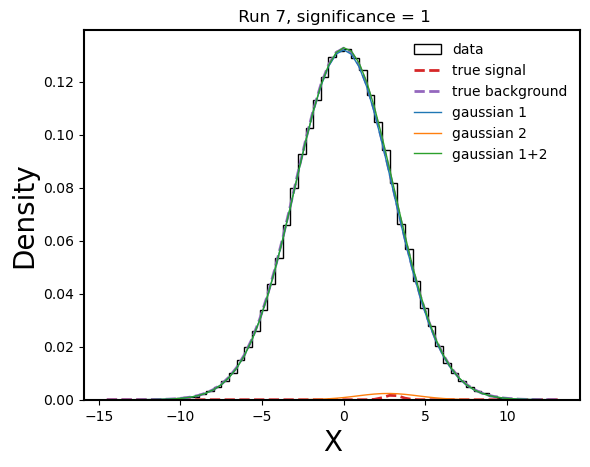

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


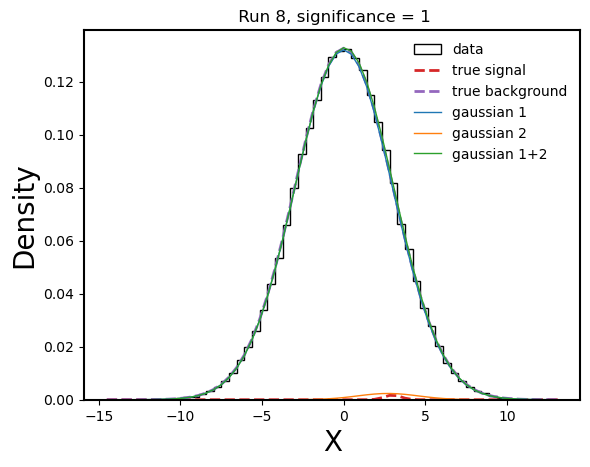

[-0.00807665  2.7068607 ]
[8.93007217 3.49794801]
[0.98891876 0.01108124]


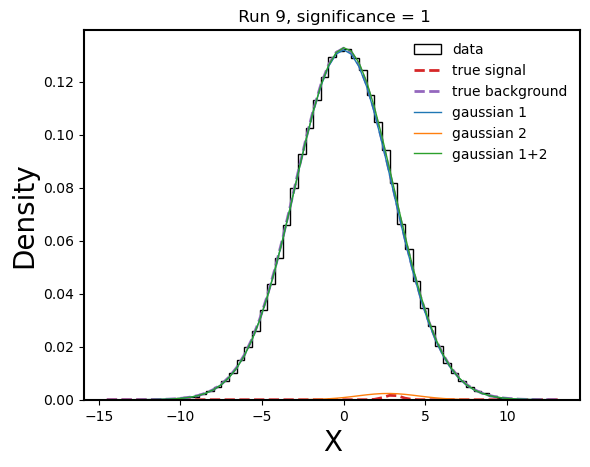

In [7]:
for sig_train in [1]:

    for run in range(10):

        x_train = data[str(sig_train)]['train']['data']
        bins = np.linspace(min(x_train.flatten()), max(x_train.flatten()), 60)
        x_axis = bins

        w1 = true_w[str(sig_train)][0]
        w2 = true_w[str(sig_train)][1]
        true_sig = norm.pdf(x_axis, sig_mean, sig_simga)*w1
        true_back = norm.pdf(x_axis, back_mean, back_sigma)*w2

        mu_ = best_mu
        sigma_ = best_sigma
        w_ = best_w
        print(mu_)
        print(sigma_)
        print(w_)
        plt.hist(x_train, density=True, color='black', bins=bins, histtype='step',
                    label='data')
        plt.plot(x_axis, true_sig, lw=2, c='C3', label='true signal',ls='--')
        plt.plot(x_axis, true_back, lw=2, c='C4', label='true background', ls='--')
        plt.plot(x_axis, w_[0] * norm.pdf(x_axis, mu_[0], np.sqrt(sigma_[0])), lw=1, c='C0', label='gaussian 1')
        plt.plot(x_axis, w_[1] * norm.pdf(x_axis, mu_[1], np.sqrt(sigma_[1])), lw=1, c='C1', label='gaussian 2')
        plt.plot(x_axis, w_[0] * norm.pdf(x_axis, mu_[0], np.sqrt(sigma_[0])) + w_[1] * norm.pdf(x_axis, mu_[1], np.sqrt(sigma_[1])), lw=1, c='C2', label='gaussian 1+2')
        plt.title(' Run {}, significance = {}'.format(run,sig_train))
        plt.xlabel(r"X", fontsize=20)
        plt.ylabel(r"Density", fontsize=20)
        plt.legend(frameon=False)
        plt.show()

In [22]:

fit = gmm.fit(background.reshape(-1,1))

mu_b = fit.means_[0][0]
sigma_b = fit.covariances_[0][0]


array([[[9.10775434]]])

In [27]:
1/(1 - (0.033*0.25)**2/(0.025**2)) 

1.122208506340478